# **Easy VISA Project**

#### **Phase 2: Exploratory Data Analysis (EDA)**

##### Task 2.1 Conduct exploratory data analysis to understand the distribution of features and the target variable

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# loading datasets
df = pd.read_csv("cleaned_easy_visa.csv")

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [57]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [67]:
# grouping columns into numerical and categorical

numerical_cols = [x for x in df.columns if df[x].dtype in ["int64", "float64"]]
categorical_cols = [x for x in df.columns if df[x].dtype in ["object"]]

In [68]:
df[numerical_cols].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [69]:
df[categorical_cols].describe().T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [70]:
categorical_cols.remove("case_id")

#### Task 2.2 Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots

##### Univariate Analysis

In [ ]:
def univariate_num_analysis(column, df):
    "Univariate analysis on numerical columns"

    print(f"\nFeature: {column}\n")
    print(df[column].describe().to_frame())
    print(f"\nSkewness: \n{df[column].skew()}")
    print(f"Kurtosis: \n{df[column].kurt()}")

    plt.figure(figsize = (10, 2))

    # histogram
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde = True, bins = 24, color = 'black')
    plt.title(f"Distribution of {column}", fontsize = 11)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1,2,2)
    sns.boxplot(df[column], color='black')
    plt.title(f"Boxplot of {column}", fontsize = 11)

    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"{column} is highly skewed")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed")
    else:
        print(f"{column} is symmetric")


Feature: no_of_employees

       no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000

Skewness: 
12.265260077708279
Kurtosis: 
206.33501961590898


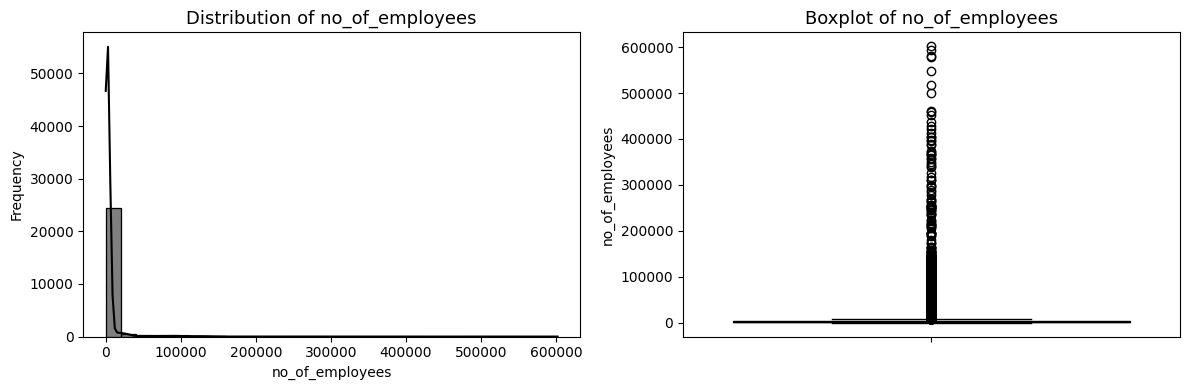

no_of_employees is highly skewed

Feature: yr_of_estab

        yr_of_estab
count  25480.000000
mean    1979.409929
std       42.366929
min     1800.000000
25%     1976.000000
50%     1997.000000
75%     2005.000000
max     2016.000000

Skewness: 
-2.0373012716764376
Kurtosis: 
3.5069567560523933


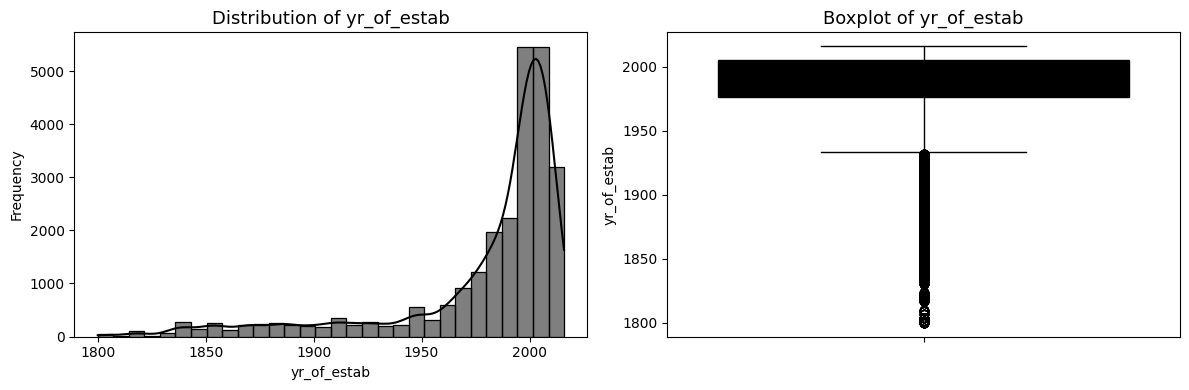

yr_of_estab is highly skewed

Feature: prevailing_wage

       prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000

Skewness: 
0.7557760603032042
Kurtosis: 
0.8242735210525516


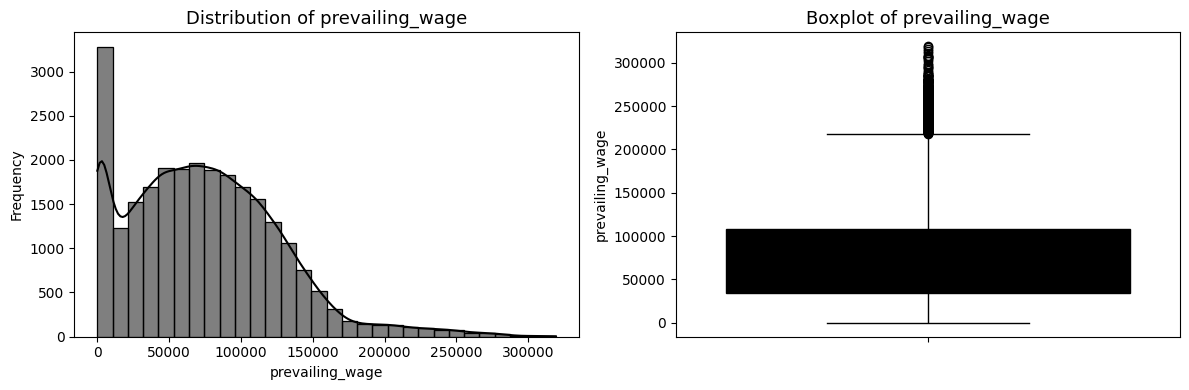

prevailing_wage is moderately skewed


In [102]:
for col in numerical_cols:
    univariate_num_analysis(col, df)

In [116]:
def univariate_cat_analysis(data, column):
    "Univariate analysis on categorical columns"

    print(f"Feature: {column}")
    print("="*40)

    # frequency
    freq = data[column].value_counts()
    prop = data[column].value_counts(normalize = True) * 100
    summary = pd.DataFrame({"Count": freq, "Percentage": prop.round(2)})
    print(summary)
    print()

    plt.figure(figsize = (8,5))
    # barchart
    plt.subplot(1,2,1)
    ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")
    plt.title(f"Distribution Barchart of {column}", fontsize = 11)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation = 60)

    # # piechart
    # plt.subplot(1,2,2)
    # df[col].value_counts().plot(kind = "pie", autopct = "%1.1f%%", startangle = 90)
    # plt.title(f"Distribution Piechart of {column}", fontsize = 11)

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1, f"{(height/total)*100:.1f}%", ha="center")

    plt.tight_layout()
    plt.show()

Feature: continent
               Count  Percentage
continent                       
Asia           16861       66.17
Europe          3732       14.65
North America   3292       12.92
South America    852        3.34
Africa           551        2.16
Oceania          192        0.75



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


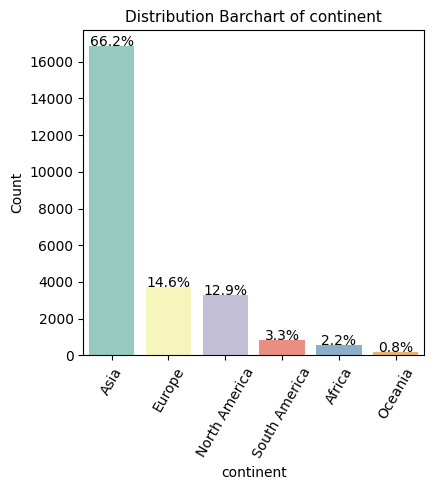

Feature: education_of_employee
                       Count  Percentage
education_of_employee                   
Bachelor's             10234       40.16
Master's                9634       37.81
High School             3420       13.42
Doctorate               2192        8.60



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


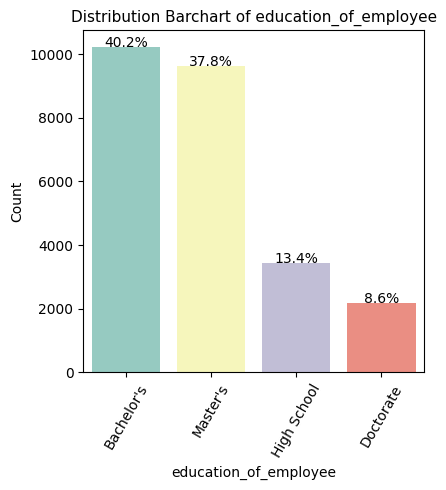

Feature: has_job_experience
                    Count  Percentage
has_job_experience                   
Y                   14802       58.09
N                   10678       41.91



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


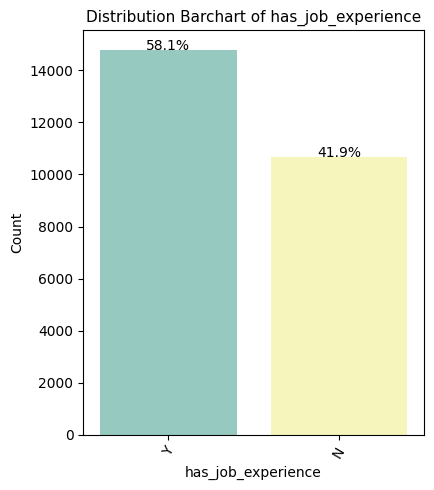

Feature: requires_job_training
                       Count  Percentage
requires_job_training                   
N                      22525        88.4
Y                       2955        11.6



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


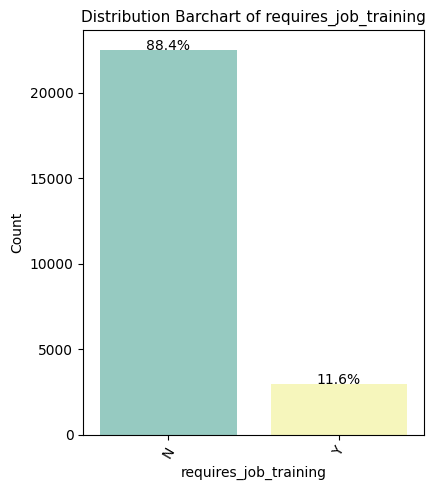

Feature: region_of_employment
                      Count  Percentage
region_of_employment                   
Northeast              7195       28.24
South                  7017       27.54
West                   6586       25.85
Midwest                4307       16.90
Island                  375        1.47



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


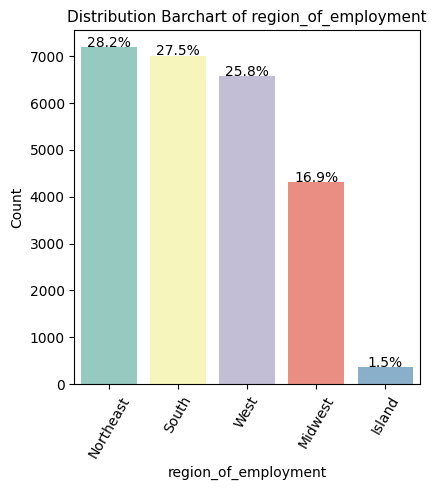

Feature: unit_of_wage
              Count  Percentage
unit_of_wage                   
Year          22962       90.12
Hour           2157        8.47
Week            272        1.07
Month            89        0.35



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


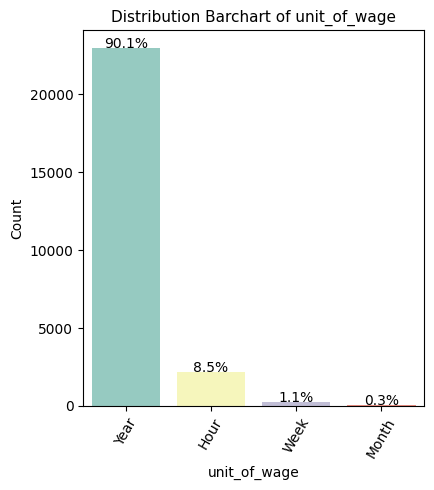

Feature: full_time_position
                    Count  Percentage
full_time_position                   
Y                   22773       89.38
N                    2707       10.62



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


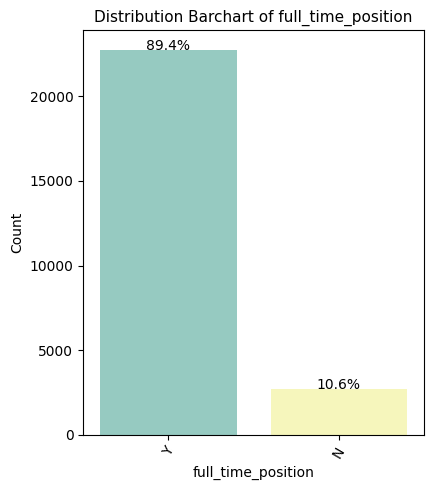

Feature: case_status
             Count  Percentage
case_status                   
Certified    17018       66.79
Denied        8462       33.21



C:\Users\ncc\AppData\Local\Temp\ipykernel_10460\3119682288.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = column, data=df, palette = "Set3", order=freq.index, color = "black")


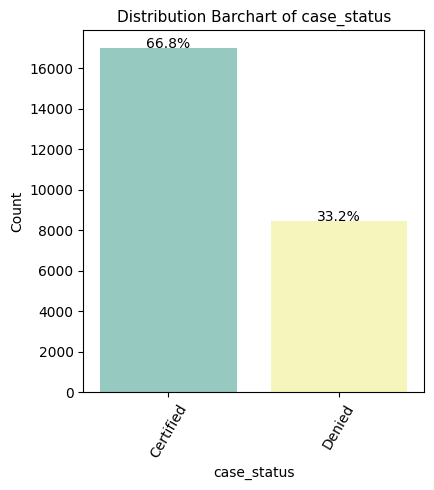

In [117]:
for col in categorical_cols:
    univariate_cat_analysis(df, col)

##### Bivariate Analysis

In [104]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [107]:
numerical_features = [x for x in df.columns if df[x].dtype in ["int64", "float64"]]

numerical_features = pd.DataFrame(df[numerical_features])
numerical_features.head()

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900


In [108]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
def correlation_with_target(df, target_col, figsize = (7, 4)):
    "plots a heatmap showing the correlation of each numeric feature against target_col"
    
    # correlations of every numeric column with the target column
    corrs = df[categorical_cols].corrwith(df['case_status']).drop(target_col)

    corrs_df = corrs.to_frame(name = 'corr').T

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws = {"orientation": "vertical", "shrink": 0.5}
    )

    plt.xticks(rotation = 0, ha='right')
    plt.yticks([0], [target_col], rotation = 0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize = 11)
    plt.tight_layout()
    plt.show()

    # sorted correlation for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

In [ ]:
corr_series = correlation_with_target(df, 'case_status', figsize = (10, 1.5))
(corr_series)